**House prediction model**

A housing prediction model is a machine learning or statistical model designed to predict the price of houses based on various features of the properties. Below is a summary of how a typical housing prediction model works, the key steps involved in building it, and an example of such a model.<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.Data Collection<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.Data Preprocessing<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.Model Selection<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.Model Training<br>
&nbsp;&nbsp;&nbsp;&nbsp;5.Model Evaluation<br>
&nbsp;&nbsp;&nbsp;&nbsp;6.Model Deployment<br>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
from sklearn.preprocessing import StandardScaler

In [5]:
data =pd.read_csv('C:\\Users\\kiruthik\\OneDrive\\Desktop\\bharath intern\\task1\\Housing.csv')

In [6]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
data.shape

(545, 13)

In [9]:
data.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
rs,cs=data.shape
data.drop_duplicates(inplace=True)
if data.shape==(rs,cs):
    print("\nThe dataframe doesn\'t have any duplicates")
else:
    print(f'No.of duplicates removed from the dataframe is: {rs-data.shape[0]}')



The dataframe doesn't have any duplicates


In [13]:
from sklearn.preprocessing import LabelEncoder
categ = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
le_dict = {}
for feature in categ:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    le_dict[feature] = le


In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

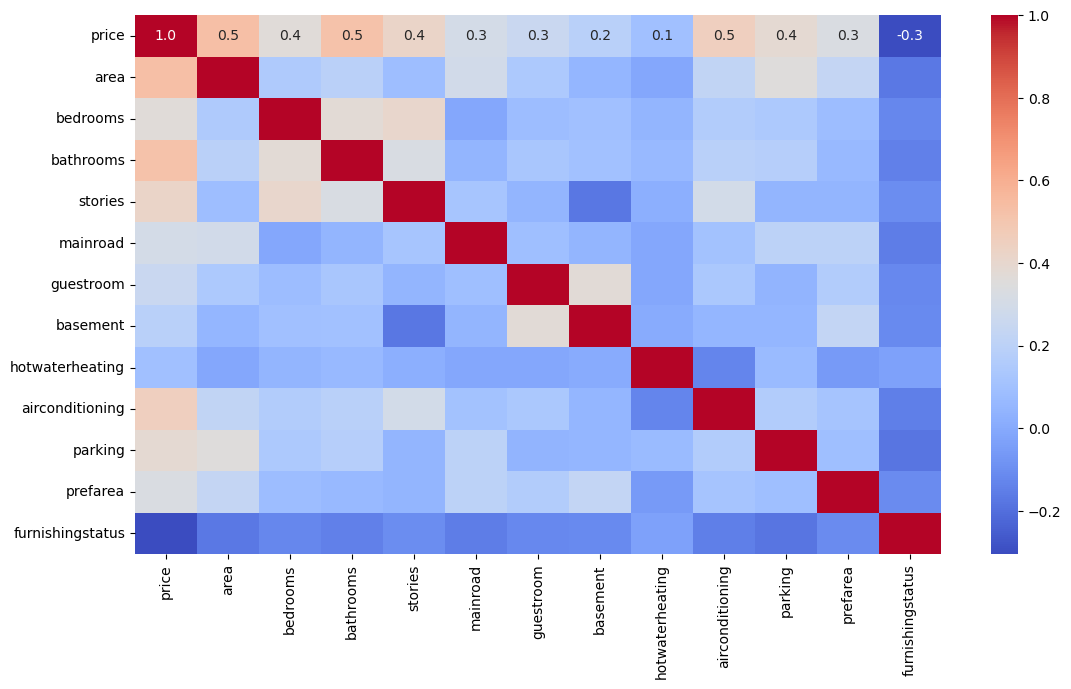

In [15]:
corr=data.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.1f', annot_kws={"size": 10})

In [16]:
X=data.drop(['price'],axis=1)
Y=data['price']

In [17]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [18]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [19]:

from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [20]:
len(X_train),len(X_test)

(327, 218)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [22]:
import joblib
joblib.dump(model,'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')

['label_encoders.pkl']

In [23]:
Y_predict=model.predict(X_test)

In [24]:
Y_predict

array([5139126.11509889, 6864096.61315591, 3124961.80734509,
       4497259.0691162 , 3453078.82795929, 3658786.05335467,
       5756061.40711976, 6334065.48065708, 2905911.74259409,
       2755395.145516  , 9044642.61595318, 2853836.36740271,
       3063914.13787157, 3415185.76589188, 3770270.21905915,
       5043785.24403995, 2993935.93280696, 4759908.14702968,
       4498835.9796764 , 3618231.62105609, 5480621.26311891,
       5805278.81522895, 2782110.90979677, 4792824.05800101,
       5475769.85270225, 7395579.72215648, 3414508.26597854,
       5271421.10973601, 8195463.46574573, 3490052.80818691,
       6029294.44194337, 3390587.08271653, 6632125.25410565,
       4259186.88879842, 3655470.54400509, 5556507.67071684,
       5047590.79841578, 4319770.6033456 , 3107315.63183911,
       4548537.72665736, 4731195.49691376, 3421845.65270779,
       6843963.15137178, 4151286.02295902, 3806982.82528224,
       4244787.01543812, 6418168.64516259, 4121373.33901317,
       3889702.97619581,

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)



In [26]:
score

0.673498902164766

In [27]:
mae

906581.2384776319

In [28]:
import joblib
import pandas as pd

def predict_house_price(features):
    # Load the saved model, scaler, and label encoders
    model = joblib.load('house_price_model.pkl')
    scaler = joblib.load('scaler.pkl')
    le_dict = joblib.load('label_encoders.pkl')

    # Create DataFrame from features
    features_df = pd.DataFrame([features])

    # Debug: Print encoder classes and input feature value
    for feature, encoder in le_dict.items():
        if feature in features_df.columns:
            print(f"Encoder for '{feature}': Classes: {encoder.classes_}")
            print(f"Input value for '{feature}': {features_df[feature].values[0]}")
            # Check if the feature value is among the known classes
            if features_df[feature].values[0] not in encoder.classes_:
                raise ValueError(f"Unexpected value '{features_df[feature].values[0]}' for feature '{feature}'")
            features_df[feature] = encoder.transform(features_df[feature])
    
    # Ensure all expected features are present
    expected_features = set(le_dict.keys())
    missing_features = expected_features - set(features_df.columns)
    if missing_features:
        raise ValueError(f"Missing features in input data: {missing_features}")
    
    # Scale the features
    features_scaled = scaler.transform(features_df)
    
    # Predict using the loaded model
    predicted_price = model.predict(features_scaled)
    
    return predicted_price[0]

# Example user input
user_input = {
    'area': 600,
    'bedrooms': 2,
    'bathrooms': 2,
    'stories': 3,
    'mainroad': 'no',         # Use 'yes' or 'no'
    'guestroom': 'no',         # Use 'yes' or 'no'
    'basement': 'no',          # Use 'yes' or 'no'
    'hotwaterheating': 'no',   # Use 'yes' or 'no'
    'airconditioning': 'no',  # Use 'yes' or 'no'
    'parking': 1,
    'prefarea': 'yes',         # Use 'yes' or 'no'
    'furnishingstatus': 'furnished'      # Should match the integer values used during training (0, 1, 2)
}

try:
    predicted_price = predict_house_price(user_input)
    print(f"The predicted house price is: {predicted_price}")
except ValueError as e:
    print(e)


Encoder for 'mainroad': Classes: ['no' 'yes']
Input value for 'mainroad': no
Encoder for 'guestroom': Classes: ['no' 'yes']
Input value for 'guestroom': no
Encoder for 'basement': Classes: ['no' 'yes']
Input value for 'basement': no
Encoder for 'hotwaterheating': Classes: ['no' 'yes']
Input value for 'hotwaterheating': no
Encoder for 'airconditioning': Classes: ['no' 'yes']
Input value for 'airconditioning': no
Encoder for 'prefarea': Classes: ['no' 'yes']
Input value for 'prefarea': yes
Encoder for 'furnishingstatus': Classes: ['furnished' 'semi-furnished' 'unfurnished']
Input value for 'furnishingstatus': furnished
The predicted house price is: 1404266.651443015


C:\Users\kiruthik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
